In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [ ]:
olist_customers=pd.read_csv('olist_customers_dataset.csv')
olist_geolocation=pd.read_csv('olist_geolocation_dataset.csv',   encoding='utf-8')
olist_order_items=pd.read_csv('olist_order_items_dataset.csv', encoding='utf-8')
olist_order_payments=pd.read_csv('olist_order_payments_dataset.csv', encoding='utf-8')
olist_order_reviews=pd.read_csv('olist_order_reviews_dataset.csv', encoding='utf-8')
olist_orders=pd.read_csv('olist_orders_dataset.csv', encoding='utf-8')
olist_products=pd.read_csv('olist_products_dataset.csv', encoding='utf-8')
olist_sellers=pd.read_csv('olist_sellers_dataset.csv', encoding='utf-8')
product_category_name=pd.read_csv('product_category_name_translation.csv', encoding='utf-8')

In [ ]:
df1=pd.merge(left=olist_orders,right=olist_order_payments,how='inner',on='order_id')
df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1.0,2.00
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1.0,141.46
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3.0,179.12
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,credit_card,1.0,72.20


In [ ]:
df2=pd.merge(left=df1,right=olist_customers,how='inner',on='customer_id')
df2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,1,credit_card,10.0,146.45,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO
2,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23 00:00:00,2,voucher,1.0,62.15,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA
3,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23 00:00:00,3,voucher,1.0,24.86,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA
4,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,1,boleto,1.0,118.86,d699688533772c15a061e8ce81cb56df,4001,sao paulo,SP


In [ ]:
df3=pd.merge(left=df2,right=olist_order_reviews,how='inner',on='order_id')
df3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [ ]:
df4=pd.merge(left=df3,right=olist_order_items,how='inner',on='order_id')
df4.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,credit_card,...,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1,credit_card,...,NaN,fiquei triste por n ter me atendido.,2017-05-13 00:00:00,2017-05-13 20:25:42,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,credit_card,...,NaN,NaN,2017-05-27 00:00:00,2017-05-28 02:59:57,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17


In [ ]:
df5=pd.merge(left=df4,right=olist_products,how='inner',on='product_id')
df5.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,credit_card,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1,credit_card,...,49.90,16.05,NaN,NaN,NaN,NaN,600.0,35.0,35.0,15.0
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,credit_card,...,59.99,15.17,automotivo,59.0,956.0,1.0,50.0,16.0,16.0,17.0


In [ ]:
df6=pd.merge(left=df5,right=olist_sellers,how='inner',on='seller_id')
df6.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,credit_card,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752,mogi das cruzes,SP
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1,credit_card,...,NaN,NaN,NaN,600.0,35.0,35.0,15.0,5455,sao paulo,SP
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,credit_card,...,59.0,956.0,1.0,50.0,16.0,16.0,17.0,12940,atibaia,SP


In [ ]:
df=df6

In [ ]:
print(df.isnull().sum())

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    3
order_delivered_carrier_date       301
order_delivered_customer_date      602
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             25431
review_comment_message           16671
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date      

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,credit_card,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752,mogi das cruzes,SP
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1,credit_card,...,NaN,NaN,NaN,600.0,35.0,35.0,15.0,5455,sao paulo,SP
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,credit_card,...,59.0,956.0,1.0,50.0,16.0,16.0,17.0,12940,atibaia,SP


In [ ]:
df['product_weight_g'].fillna(df['product_weight_g'].mean(), inplace=True)

In [ ]:
df['product_length_cm'].fillna(df['product_length_cm'].mean(), inplace=True)

In [ ]:
df['product_height_cm'].fillna(df['product_height_cm'].mean(), inplace=True)

In [ ]:
df['product_width_cm'].fillna(df['product_width_cm'].mean(), inplace=True)

In [ ]:
duplicates = df.duplicated()
print(duplicates.sum())

0


In [ ]:
print(df.isnull().sum())

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    3
order_delivered_carrier_date       301
order_delivered_customer_date      602
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             25431
review_comment_message           16671
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date      

In [ ]:
df.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,28841.000000,28841.000000,28841.000000,28841.000000,28841.000000,28841.000000,28841.000000,28841.000000,28431.000000,28431.000000,28431.000000,28841.000000,28841.000000,28841.000000,28841.000000,28841.000000
mean,1.079193,2.947055,175.067410,35339.360147,4.042925,1.194792,121.105240,19.806986,48.696493,788.643277,2.190109,2095.976349,30.277674,16.614232,23.139895,24376.566832
std,0.523879,2.769034,334.445382,29897.108260,1.375116,0.665154,185.740193,15.007147,10.155901,654.684871,1.702262,3733.585564,16.301659,13.411179,11.838836,27619.665748
min,1.000000,1.000000,0.010000,1007.000000,1.000000,1.000000,3.490000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,7.000000,1001.000000
25%,1.000000,1.000000,61.590000,11630.000000,4.000000,1.000000,39.900000,13.110000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6436.000000
50%,1.000000,2.000000,108.810000,24358.000000,5.000000,1.000000,74.900000,16.350000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13484.000000
75%,1.000000,4.000000,189.590000,59144.000000,5.000000,1.000000,134.990000,21.100000,57.000000,989.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,26510.000000
max,15.000000,24.000000,13664.080000,99965.000000,5.000000,14.000000,6735.000000,339.590000,76.000000,3992.000000,18.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


In [ ]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [ ]:
date_cols=['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','review_answer_timestamp','shipping_limit_date','review_creation_date']

In [ ]:
for i in date_cols:
    df[i]=pd.to_datetime(df[i])

In [ ]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,credit_card,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752,mogi das cruzes,SP
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1,credit_card,...,NaN,NaN,NaN,600.0,35.0,35.0,15.0,5455,sao paulo,SP
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,1,credit_card,...,59.0,956.0,1.0,50.0,16.0,16.0,17.0,12940,atibaia,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28836,24b2265078f470c6e64f81625408f93e,65670445ff86b5ac5bd223fed24d8f91,delivered,2018-02-01 20:08:01,2018-02-01 20:29:41,2018-02-03 00:38:39,2018-02-15 23:27:44,2018-03-27,1,credit_card,...,60.0,585.0,2.0,2300.0,53.0,40.0,22.0,37584,congonhal,MG
28837,8164479321ad8dee50301cba9250bf42,96628803e4a340206f049af5fff7c202,delivered,2017-11-21 18:59:56,2017-11-21 19:11:54,2017-11-28 23:18:52,2017-12-26 22:22:20,2017-12-11,1,credit_card,...,56.0,230.0,1.0,700.0,45.0,15.0,35.0,14940,ibitinga,SP
28838,866ee8efa015a0dbacb8c2628096a8c4,87b45e61c9e0756eef3e23c7de7d84d7,delivered,2017-09-13 11:11:12,2017-09-13 11:25:23,2017-09-15 17:57:39,2017-09-26 21:48:46,2017-10-04,1,credit_card,...,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,9015,santo andre,SP
28839,0cd218949b04611711989a6b534d9a26,cae389249163795aa33fe9b7b28dc22b,delivered,2018-02-18 13:36:51,2018-02-18 13:46:39,2018-02-19 22:22:51,2018-02-27 23:42:15,2018-03-16,1,credit_card,...,59.0,2197.0,6.0,1000.0,35.0,10.0,20.0,3035,sao paulo,SP


In [ ]:
df=df.drop(['customer_zip_code_prefix','seller_zip_code_prefix'],axis=1)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,...,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,guariba,SP
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,credit_card,...,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,mogi das cruzes,SP
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1,credit_card,...,NaN,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,1,credit_card,...,automotivo,59.0,956.0,1.0,50.0,16.0,16.0,17.0,atibaia,SP


In [ ]:
df=df.drop(['review_creation_date','review_answer_timestamp','shipping_limit_date'],axis=1)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,...,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,guariba,SP
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,credit_card,...,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,mogi das cruzes,SP
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1,credit_card,...,NaN,NaN,NaN,NaN,600.0,35.0,35.0,15.0,sao paulo,SP
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,1,credit_card,...,automotivo,59.0,956.0,1.0,50.0,16.0,16.0,17.0,atibaia,SP


In [ ]:
df.shape

(28841, 34)

In [ ]:

basket = (df
          .groupby(['order_id', 'product_category_name'])['product_category_name']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))


basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.041838,(automotivo)
1,0.030328,(bebes)
2,0.090397,(beleza_saude)
3,0.040326,(brinquedos)
4,0.098631,(cama_mesa_banho)
5,0.010502,(consoles_games)
6,0.037260,(cool_stuff)
7,0.025162,(eletronicos)
8,0.077712,(esporte_lazer)
9,0.019155,(fashion_bolsas_e_acessorios)


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


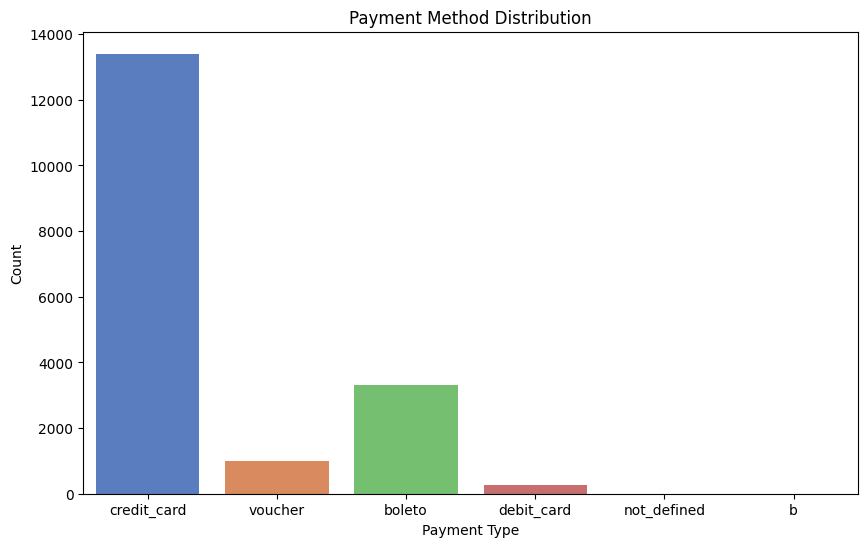

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=df1, palette='muted')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

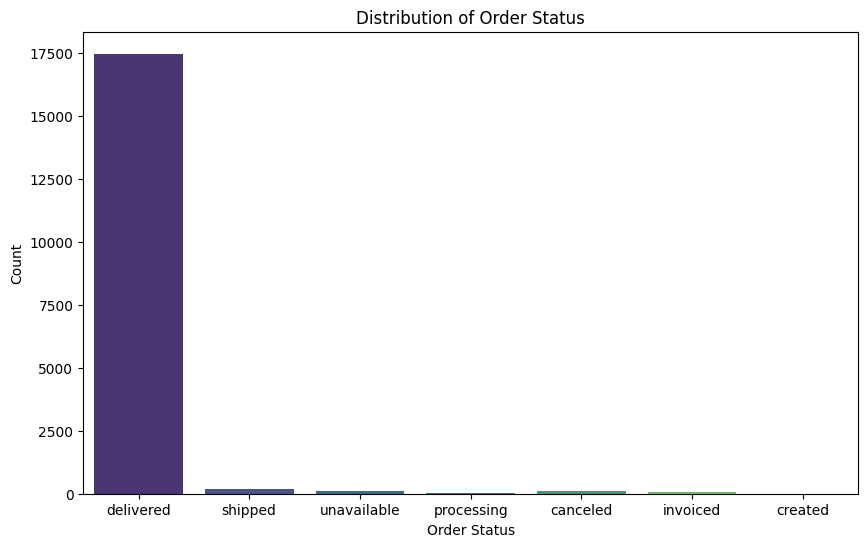

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='order_status', data=df1, palette='viridis')
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

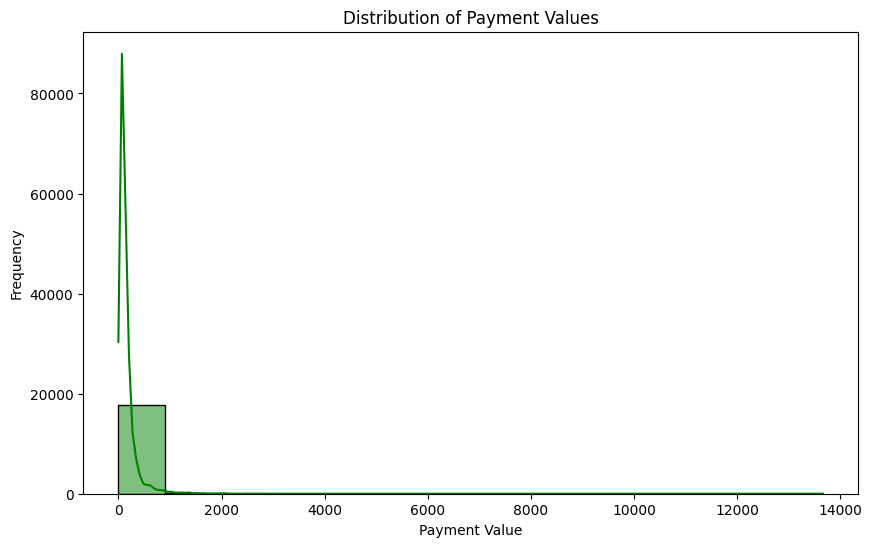

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['payment_value'], bins=15, kde=True, color='g')
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()